# Exemple Solution Equilibre General

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import bisect

## Preferences

Les deux consommateurs ont des preferences:
$$ U_i(X_i,Y_i) = \log X_i + \alpha \log Y_i $$
Les demandes sont :
$$X_{i,d} = \frac{1}{1+\alpha} I_i$$
$$Y_{i,d} = \frac{\alpha}{1+\alpha} \frac{I_i}{p}$$
ou le revenu est $$X_{i} + p Y_{i} + \rho_i \Pi$$


In [2]:
alpha = 2
rho = [0.0,1.0]
xe  = [2.0,0.0]
ye  = [0.0,0.0]
def u(x,y,alpha):
    return np.log(x) + alpha*np.log(y)
def fxd(p,income,alpha):
    return (1.0/(1.0+alpha))*income
def fyd(p,income,alpha):
    return (alpha/(1.0+alpha))*income/p
def finc(xe,ye,p,rho,profit):
    return xe + p*ye + rho*profit

In [3]:
finc(0.0,0.0,0.0,1.0,100.0)

100.0

## Firme

La firme a une fonction de production:
$$ Y = F(X) = \log(1+X) $$
Si elle maximise ses profits etant donne un prix $p$ on obtient la demande de l'input
$$X_{f,d} = p - 1 $$
et donc l'offre de $Y_{f,s} = \log p$. 

In [5]:
def fxf(p):
    return p-1.0
def fyf(p):
    return np.log(p)

Ses profits sont:
    $$ \Pi = p\log p - p + 1 $$ 

In [6]:
def fprofit(p):
    return p*np.log(p) - p + 1.0

In [8]:
fprofit(2.13)

0.48053981680644076

## Prix

le prix d'equilibre est donne par:

In [5]:
def xequilibre(p,alpha,rho,xe,ye):
    # entreprise
    xf = fxf(p)
    yf = fyf(p)
    profit = fprofit(p)
    # consommateur
    xd = [0.0,0.0]
    for i in range(2):
        income = finc(xe[i],ye[i],p,rho[i],profit)
        xd[i] = fxd(p,income,alpha)
    # demande pour X
    excess = np.sum(xd) + xf - np.sum(xe)
    return excess


On peut regarder que la demande excedentaire en fonction du prix

In [6]:
prix = np.linspace(0.1,10.0,100)
mx = [xequilibre(p,alpha,rho,xe,ye) for p in prix]

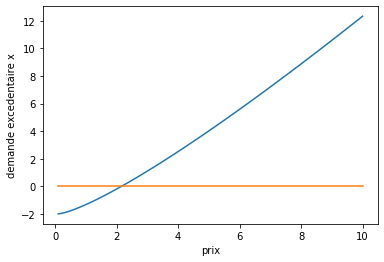

In [7]:
plt.figure()
plt.plot(prix,mx,label='xd - xe')
plt.plot(prix,np.zeros(len(prix)))
plt.xlabel('prix')
plt.ylabel('demande excedentaire x')
plt.show()

In [8]:
[print(p,m) for p,m in zip(prix,mx)]

0.1 -2.0100861697664683
0.2 -1.9739625274956067
0.30000000000000004 -1.9203972804325935
0.4 -1.855505430916554
0.5 -1.782191196759991
0.6 -1.7021651247531984
0.7000000000000001 -1.6165574869190376
0.8 -1.5261716136837893
0.9 -1.431608154697348
1.0 -1.3333333333333335
1.1 -1.2317196007384141
1.2000000000000002 -1.1270713772824181
1.3000000000000003 -1.0196421520640868
1.4000000000000001 -0.9096462895767672
1.5000000000000002 -0.7972674459459177
1.6 -0.6826647310689409
1.7000000000000002 -0.5659773243981032
1.8000000000000003 -0.4473280010587284
1.9000000000000001 -0.3268258720908166
2.0 -0.20456854629336974
2.1 -0.0806438586894358
2.2 0.04486873093379806
2.3000000000000003 0.17189699425024685
2.4000000000000004 0.30037498988312006
2.5000000000000004 0.43024227656179637
2.6 0.5614432523571118
2.7 0.6939265957092551
2.8000000000000003 0.8276447893690815
2.9000000000000004 0.9625537124260144
3.0000000000000004 1.09861228866811
3.1 1.2357821818741375
3.2 1.3740275304593927
3.300000000000000

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

On peut utiliser un optimisateur numerique pour trouver le prix

In [9]:
pstar = bisect(xequilibre, 0.01, 10.0, args=(alpha,rho,xe,ye)) 
pstar

2.1643929182195403

Et retrouver les demandes, etc. 

In [10]:
xf = fxf(pstar)
yf = fyf(pstar)
profit = fprofit(pstar)
print('entreprise (xf,yf,profit) = ',xf,yf,profit)
xd = [0.0,0.0]
yd = [0.0,0.0]
for i in range(2):
    income = finc(xe[i],ye[i],pstar,rho[i],profit)
    xd[i] = fxd(pstar,income,alpha)
    yd[i] = fyd(pstar,income,alpha)
    fyd(pstar,income,alpha)
    print('consommateur 1 (income,xd,yd,u) = ',income,xd[i],yd[i],u(xd[i],yd[i],alpha))


entreprise (xf,yf,profit) =  1.1643929182195403 0.7721399148440825 0.5068212453436307
consommateur 1 (income,xd,yd,u) =  2.0 0.6666666666666666 0.6160310921873426 -1.3743807928927678
consommateur 1 (income,xd,yd,u) =  0.5068212453436307 0.16894041511454355 0.15610882265639298 -5.492613067111362


## Experience

Qu'arrive-t-il au prix si on change $\alpha$?

In [11]:
alphas = np.linspace(0.5,3.0,100)
pstars = [bisect(xequilibre, 0.01, 10.0, args=(alpha,rho,xe,ye)) for alpha in alphas]

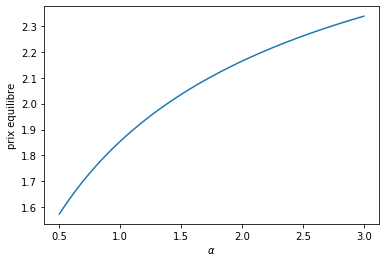

In [12]:
plt.figure()
plt.plot(alphas,pstars)
plt.xlabel('$\\alpha$')
plt.ylabel('prix equilibre')
plt.show()

Et si on change $\rho$?

In [13]:
rhos = np.linspace(0.1,0.9,100)
pstars = [bisect(xequilibre, 0.01, 10.0, args=(alpha,[rho,1.0-rho],xe,ye)) for rho in rhos]

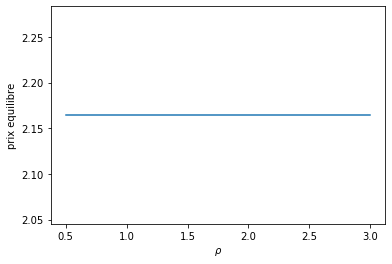

In [14]:
plt.figure()
plt.plot(alphas,pstars)
plt.xlabel('$\\rho$')
plt.ylabel('prix equilibre')
plt.show()

## Epilogue

* Peut etre facilement etendu a plusieurs consommateurs et firmes
* Peut avoir des preferences differentes, etc. 
* introduire le risque